# Pre-Modelling: Data Preprocessing and Feature Exploration in Python

- https://datahub.io/machine-learning/adult#resource-adult - Dataset available

### Data Cleaning
- Dealing with Data types
- Handling Missing values

### Data Exploration
- Outlier Detection
- Plotting Distribution (Visualization)

#### Note: Feature Engineering/Feature Selection not included

### IMPORT LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
pd.options.display.max_columns = None
display()

### IMPORT DATASET

In [4]:
df = pd.read_csv(r"F:/My Business/Linkedin_DataScience Course/Session - 3/adult_csv.csv")

In [5]:
#check number of rows and columns
df.shape

(48842, 15)

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2.0,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3.0,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2.0,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3.0,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1.0,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [7]:
#Take a look at the outcome variable: 'class' - denotes income <=50K or >50K
df['class'].value_counts()

<=50K    37155
>50K     11687
Name: class, dtype: int64

In [8]:
#Assign outcome as 0 if income <=50K and 1 if income >50K
def assign_target(df):
    if df['class'] == "<=50K":
        return 1
    else:
        return 0
    
df['class_1'] = df.apply(assign_target, axis=1)

In [9]:
df['class_1'].value_counts()

1    37155
0    11687
Name: class_1, dtype: int64

In [10]:
#Split target variable and independent variable
x = df.drop(['class_1','class'],axis=1)
y = df[['class_1']]

## BASIC DATA CLEANING

### Dealing with Data types

There are three main data types:
- Numeric, eg:income,age
- Categorical, eg: gender, nationality
- Ordinal eg: low/medium/high (Like discrete types)

#Models can only handle numeric features
- Must convert categorical and ordinal features into numeric features
- Creat dummy features
- Transform a categorical feature into a set of dummy features, each representing a unique categories
- In the set of dummy features, 1 indicates that the observation belongs to that category

In [11]:
#eg: 'Education' is a categorical feature
print(x['education'].head(5))

0    Bachelors
1    Bachelors
2      HS-grad
3         11th
4    Bachelors
Name: education, dtype: object


In [12]:
#Use get_dummies in pandas
#Another option: OneHotEncoder in sci-kit learn
print(pd.get_dummies(x['education']).head(5))

   10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  Assoc-voc  \
0     0     0     0        0        0        0    0           0          0   
1     0     0     0        0        0        0    0           0          0   
2     0     0     0        0        0        0    0           0          0   
3     0     1     0        0        0        0    0           0          0   
4     0     0     0        0        0        0    0           0          0   

   Bachelors  Doctorate  HS-grad  Masters  Preschool  Prof-school  \
0          1          0        0        0          0            0   
1          1          0        0        0          0            0   
2          0          0        1        0          0            0   
3          0          0        0        0          0            0   
4          1          0        0        0          0            0   

   Some-college  
0             0  
1             0  
2             0  
3             0  
4             0  


In [13]:
#Decide which categorical variables you want to use in model
for col_name in x.columns:
    if x[col_name].dtypes == 'object':
        unique_cat = len(x[col_name].unique())
        print("Feature: '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat = unique_cat))

Feature: 'workclass' has 9 unique categories
Feature: 'education' has 16 unique categories
Feature: 'marital-status' has 7 unique categories
Feature: 'occupation' has 15 unique categories
Feature: 'relationship' has 6 unique categories
Feature: 'race' has 5 unique categories
Feature: 'sex' has 2 unique categories
Feature: 'native-country' has 42 unique categories


In [14]:
#Although, 'native_country' has a lot of unique categories, nost categories only have a few observations
print(x['native-country'].value_counts().sort_values(ascending=False))

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

In [15]:
#In this case, bucket low frequency categories as 'others'. Note: In few case, need to verify business logic depends on use case
x['native-country'] = ['United-States' if X=='United-States' else 'Other' for X in x['native-country']]

print(x['native-country'].value_counts())

United-States    43832
Other             5010
Name: native-country, dtype: int64


In [16]:
#Create a list of features to dummy
todummy_list = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

In [17]:
#Function to dummy all the categorical variable used for modelling
def dummy_df(df1,todummy_list):
    for X in todummy_list:
        dummies = pd.get_dummies(df1[X], prefix=X, dummy_na=False)
        df1 = df1.drop(X,1)
        df1 = pd.concat([df1,dummies],axis=1)
    return df1

In [18]:
x = dummy_df(x,todummy_list)
x.head(5)

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Other,native-country_United-States
0,2.0,77516.0,13,1,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
1,3.0,83311.0,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,2.0,215646.0,9,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
3,3.0,234721.0,7,0,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,1.0,338409.0,13,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0


## Handling Missing Data

- Simple solution - Remove observation/features that have missing data
- But removing missing data can introduce a lot of issues
- Data is randomly missing: Potentially lose a lot of your data
- Data is non-randomly missing: in addition to losing data, you are also introducing potential biases

Usually, this is a poor solution
- An alternative solution is to use imputation
- Replace missing value with another value
- Strategies: mean,median,highest frequency value of given feature

In [19]:
#Missing columns
x.isnull().sum().sort_values(ascending=False).head()

fnlwgt                 104
age                     15
education_Doctorate      0
education_5th-6th        0
education_7th-8th        0
dtype: int64

In [20]:
#Impute missing values using Imputer in sklearn library
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(x)
x = pd.DataFrame(data=imp.transform(x), columns=x.columns)

In [21]:
#Missing columns - checking again after imputing values
x.isnull().sum().sort_values(ascending=False).head()

native-country_United-States    0
education_12th                  0
marital-status_Divorced         0
education_Some-college          0
education_Prof-school           0
dtype: int64

## Data Exploration

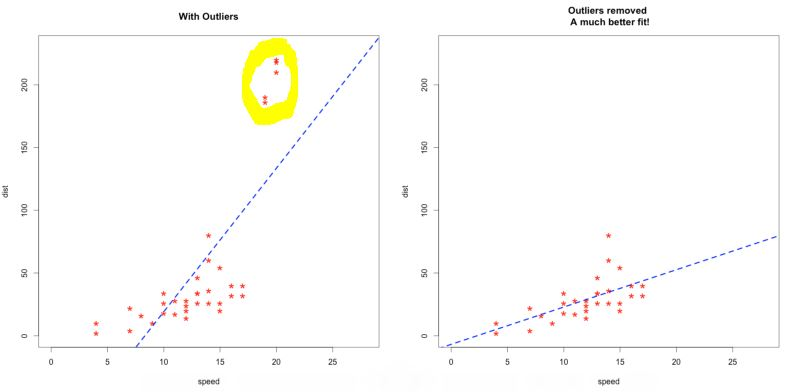

In [22]:
from IPython.display import Image
Image(filename="C:/Users/karthick's/Desktop/Jupyter/Outlier.jpg")

### Outlier Detection
 - An outlier is an observation that deviates drastically from other observations in a dataset

Many approaches for detecting outliers, we will discuss the most widely use technique:
 - IQR

IQR (Inter Quartile Range)
- Outliers are defined as: values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)

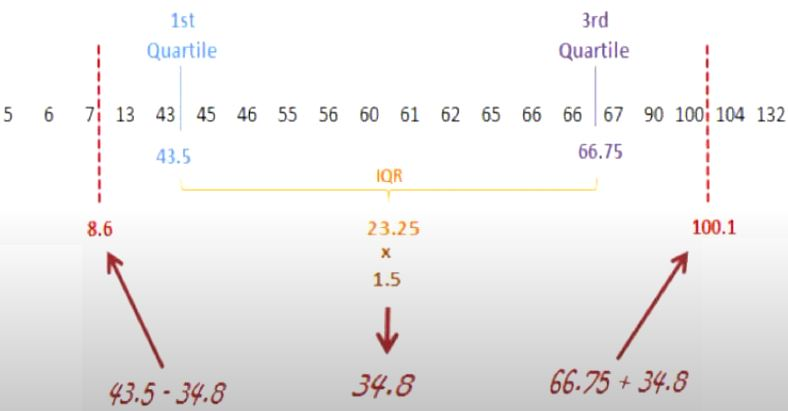

In [23]:
from IPython.display import Image
Image(filename="C:/Users/karthick's/Desktop/Jupyter/IQR.jpg")

In [24]:
def find_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr=q3-q1
    floor = q1-1.5*iqr
    ceiling = q3+1.5*iqr
    outlier_indices = list(x.index[(x<floor)|(x>ceiling)])
    outlier_values  = list(x[outlier_indices])
    
    return outlier_indices,outlier_values

In [25]:
iqr_indices, iqr_values = find_outliers(x['fnlwgt'])
print(np.sort(iqr_values))

[ 417136.  417227.  417419. ... 1455435. 1484705. 1490400.]


## Visualization - Distribution of Features

- A Histogram is a simple representation of the distribution of values for a given feature
- X-axis represents value bins and y-axis repressents the frequency of an observation falling into that bin
- It is also interesting to look at distribution broken up by outcome categories

In [26]:
#Use pyplot in matplotlib to plot histogram
%matplotlib inline
def plot_histogram(x):
    plt.hist(x,color='grey',alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

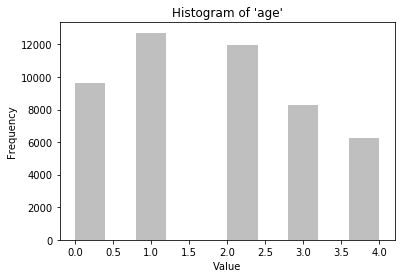

In [27]:
plot_histogram(x['age'])

In [28]:
#plot histogram to show distribution of features by Dependent Variable categories
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='DV=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='DV=1')
    plt.title("Histogram of '{var_name}' by DV category".format(var_name=x.name))
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

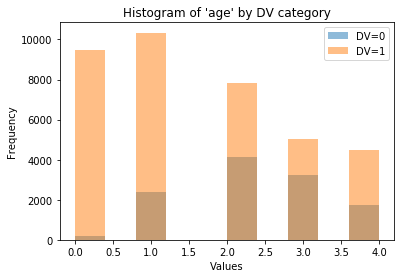

In [29]:
plot_histogram_dv(x['age'],y['class_1'])

-----------------------------------THANK YOU----------------------------------------

### Next - Feature selection/Feature engineering 